# Visual Behavior Neuropixels Quickstart

A short introduction to the Visual Behavior Neuropixels data and SDK. This notebook focuses on aligning neural data to visual and optotagging stimuli. To learn more about how to access the data, see our [data access tutorial](./visual_behavior_neuropixels_data_access.ipynb). For more information about task and behavioral data, check out the [other tutorials](https://allensdk.readthedocs.io/en/latest/visual_behavior_neuropixels.html) accompanying this dataset.

Also note that this project shares many features with the [Visual Coding Neuropixels](http://portal.brain-map.org/explore/circuits/visual-coding-neuropixels) and [Visual Behavior 2-Photon](http://portal.brain-map.org/explore/circuits/visual-coding-2p) datasets. Users are encouraged to check out the documentation for those projects for additional information and context.

Contents
-------------
* <a href='#PSTH-for-image-changes'>PSTH for image changes</a>
* <a href='#Plot-Receptive-Fields'>Plot Receptive Fields</a>
* <a href='#Optotagging'>Optotagging</a>

In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from allensdk.brain_observatory.behavior.behavior_project_cache.\
    behavior_neuropixels_project_cache \
    import VisualBehaviorNeuropixelsProjectCache

/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The `VisualBehaviorNeuropixelsProjectCache` is the main entry point to the Visual Behavior Neuropixels dataset. It allows you to download data for individual recording sessions and view cross-session summary information.

In [2]:
# Update this to a valid directory in your filesystem. This is where the data will be stored.
output_dir = "/path/to/vbn_cache"

In [4]:
cache = VisualBehaviorNeuropixelsProjectCache.from_s3_cache(
            cache_dir=Path(output_dir))

# get the metadata tables
units_table = cache.get_unit_table()

channels_table = cache.get_channel_table()

probes_table = cache.get_probe_table()

behavior_sessions_table = cache.get_behavior_session_table()

ecephys_sessions_table = cache.get_ecephys_session_table()

/home/runner/work/AllenSDK/AllenSDK/allensdk/api/cloud_cache/cloud_cache.py:413: MissingLocalManifestWarning: This cache directory appears to contain data files, but it has no record of what those files are. You might want to consider running

VisualBehaviorNeuropixelsProjectCache.construct_local_manifest()

to avoid needlessly downloading duplicates of data files that did not change between data releases. NOTE: running this method will require hashing every data file you have currently downloaded and could be very time consuming.

To avoid this warning in the future, make sure that

/tmp/tmp01j1u8ue/_downloaded_data.json

is not deleted between instantiations of this cache
  warnings.warn(msg, MissingLocalManifestWarning)
ecephys_sessions.csv: 100%|██████████| 64.7k/64.7k [00:00<00:00, 597kMB/s] 
behavior_sessions.csv: 100%|██████████| 562k/562k [00:00<00:00, 3.66MMB/s] 
units.csv: 100%|██████████| 132M/132M [00:05<00:00, 25.6MMB/s]
probes.csv: 100%|██████████| 130k/130k [00:00<00:00,

This dataset contains ephys recording sessions from 3 genotypes (C57BL6J, VIP-IRES-CrexAi32 and SST-IRES-CrexAi32). For each mouse, two recordings were made on consecutive days. One of these sessions used the image set that was familiar to the mouse from training. The other session used a novel image set containing two familiar images from training and six new images that the mouse had never seen. As an example, let's grab a session from an SST mouse during a novel session.

In [5]:
sst_novel_sessions = ecephys_sessions_table.loc[(ecephys_sessions_table['genotype'].str.contains('Sst')) & 
                                            (ecephys_sessions_table['experience_level']=='Novel')]
sst_novel_sessions.head()

,behavior_session_id,date_of_acquisition,equipment_name,session_type,mouse_id,genotype,sex,project_code,age_in_days,unit_count,...,channel_count,structure_acronyms,image_set,prior_exposures_to_image_set,session_number,experience_level,prior_exposures_to_omissions,file_id,abnormal_histology,abnormal_activity
ecephys_session_id,,,,,,,,,,,,,,,,,,,,,
1048189115,1048221709,2020-09-03 14:16:57.913000+00:00,NP.1,EPHYS_1_images_H_3uL_reward,509808,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,264,1925.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1,879,NaN,NaN
1048196054,1048222325,2020-09-03 14:25:07.290000+00:00,NP.0,EPHYS_1_images_H_3uL_reward,524925,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,F,NeuropixelVisualBehavior,166,2288.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1,880,NaN,NaN
1053941483,1053960987,2020-10-01 17:03:58.362000+00:00,NP.1,EPHYS_1_images_H_3uL_reward,527749,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,180,1543.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1,891,NaN,NaN
1064644573,1064666428,2020-11-19 15:18:01.372000+00:00,NP.1,EPHYS_1_images_H_3uL_reward,544456,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,120,2254.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1,909,NaN,NaN
1065905010,1065929713,2020-11-24 14:21:48.847000+00:00,NP.0,EPHYS_1_images_H_3uL_reward,544358,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,F,NeuropixelVisualBehavior,126,1998.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1,912,NaN,NaN


Now let's choose one of these sessions to look at more closely.

In [6]:
session_id = 1064644573
session = cache.get_ecephys_session(
            ecephys_session_id=session_id)

ecephys_session_1064644573.nwb: 100%|██████████| 2.99G/2.99G [01:33<00:00, 32.0MMB/s]


We can get a high-level summary of this session by accessing its `metadata` attribute:

In [7]:
session.metadata

{'equipment_name': 'NP.1',
 'sex': 'M',
 'age_in_days': 120,
 'stimulus_frame_rate': 60.0,
 'session_type': 'EPHYS_1_images_H_3uL_reward',
 'date_of_acquisition': datetime.datetime(2020, 11, 19, 23, 18, 1, tzinfo=tzlocal()),
 'reporter_line': 'Ai32(RCL-ChR2(H134R)_EYFP)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': None,
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '544456',
 'project_code': 'Not Available',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
 'behavior_session_id': 1064666428,
 'ecephys_session_id': 1064644573}

Now we can get the unit and channel data for this session. Merging these dataframes will give us CCF coordinates for each unit

In [8]:
units = session.get_units()
channels = session.get_channels()

unit_channels = units.merge(channels, left_on='peak_channel_id', right_index=True)

Let's look at which brain structures were recorded during this session

In [9]:
unit_channels.value_counts('structure_acronym')

structure_acronym
APN      304
CA1      295
DG       190
VISp     144
VISpm    134
VISl     118
VISal    106
MB       103
CA3      100
LP        99
VISam     96
VISrl     92
MGv       86
MRN       79
ProS      70
NB        56
PIL       56
POST      32
NOT       27
Eth       15
root      14
TH        11
SUB        9
HPF        9
MGd        7
POL        1
MGm        1
dtype: int64

### PSTH for image changes

Now we'll grab spike times and calculate the change response for 'good' units in V1. Note that how you filter units will depend on your analysis. Consult the [unit metrics notebook](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/visual_behavior_neuropixels_quality_metrics.html)  for more details.

In [10]:
#first let's sort our units by depth
unit_channels = unit_channels.sort_values('probe_vertical_position', ascending=False)

#now we'll filter them
good_unit_filter = ((unit_channels['snr']>1)&
                    (unit_channels['isi_violations']<1)&
                    (unit_channels['firing_rate']>0.1))

good_units = unit_channels.loc[good_unit_filter]
spike_times = session.spike_times

We can get the times when the image changes occurred from the stimulus presentations table. For now, we'll only take the image changes shown during the active behavior block

In [11]:
stimulus_presentations = session.stimulus_presentations
change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values

In [12]:
#Convenience function to compute the PSTH
def makePSTH(spikes, startTimes, windowDur, binSize=0.001):
    bins = np.arange(0,windowDur+binSize,binSize)
    counts = np.zeros(bins.size-1)
    for i,start in enumerate(startTimes):
        startInd = np.searchsorted(spikes, start)
        endInd = np.searchsorted(spikes, start+windowDur)
        counts = counts + np.histogram(spikes[startInd:endInd]-start, bins)[0]
    
    counts = counts/startTimes.size
    return counts/binSize, bins

We'll include enough time in our plot to see three image responses: the pre-change image response, the change response and the post-change response

In [13]:
#Here's where we loop through the units in our area of interest and compute their PSTHs
area_of_interest = 'VISp'
area_change_responses = []
area_units = good_units[good_units['structure_acronym']==area_of_interest]
time_before_change = 1
duration = 2.5
for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    unit_change_response, bins = makePSTH(unit_spike_times, 
                                          change_times-time_before_change, 
                                          duration, binSize=0.01)
    area_change_responses.append(unit_change_response)
area_change_responses = np.array(area_change_responses)

Text(0, 0.5, 'Firing Rate')

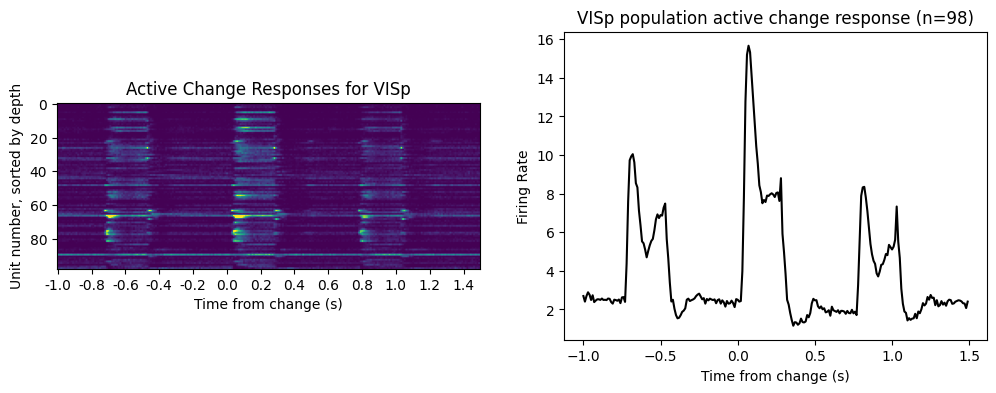

In [14]:
#Plot the results
fig, ax = plt.subplots(1,2)
fig.set_size_inches([12,4])

clims = [np.percentile(area_change_responses, p) for p in (0.1,99.9)]
im = ax[0].imshow(area_change_responses, clim=clims)
ax[0].set_title('Active Change Responses for {}'.format(area_of_interest))
ax[0].set_ylabel('Unit number, sorted by depth')
ax[0].set_xlabel('Time from change (s)')
ax[0].set_xticks(np.arange(0, bins.size-1, 20))
_ = ax[0].set_xticklabels(np.round(bins[:-1:20]-time_before_change, 2))

ax[1].plot(bins[:-1]-time_before_change, np.mean(area_change_responses, axis=0), 'k')
ax[1].set_title('{} population active change response (n={})'\
                .format(area_of_interest, area_change_responses.shape[0]))
ax[1].set_xlabel('Time from change (s)')
ax[1].set_ylabel('Firing Rate')


### Plot Receptive Fields

Now we'll plot receptive fields for these same units. First we need to get stimulus presentation data for the receptive field mapping stimulus (gabors). For more information about this stimulus, consult [this tutorial](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_receptive_fields.html) for the Visual Coding Neuropixels dataset (though note that not all the functionality in the visual coding SDK will work for this dataset).

In [15]:
rf_stim_table = stimulus_presentations[stimulus_presentations['stimulus_name'].str.contains('gabor')]
xs = np.sort(rf_stim_table.position_x.unique()) #positions of gabor along azimuth
ys = np.sort(rf_stim_table.position_y.unique()) #positions of gabor along elevation

In [16]:
def find_rf(spikes, xs, ys):
    unit_rf = np.zeros([ys.size, xs.size])
    for ix, x in enumerate(xs):
        for iy, y in enumerate(ys):
            stim_times = rf_stim_table[(rf_stim_table.position_x==x)
                                      &(rf_stim_table.position_y==y)]['start_time'].values
            unit_response, bins = makePSTH(spikes, 
                                          stim_times+0.01, 
                                          0.2, binSize=0.001)
            unit_rf[iy, ix] = unit_response.mean()
    return unit_rf

area_rfs = []
for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    unit_rf = find_rf(unit_spike_times, xs, ys)
    area_rfs.append(unit_rf)

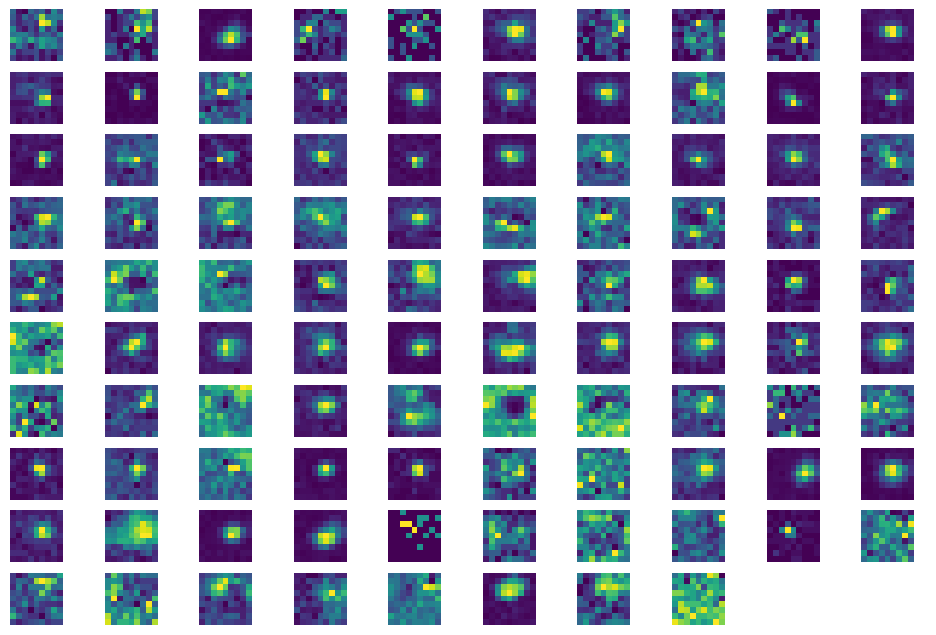

In [17]:
fig, axes = plt.subplots(int(len(area_rfs)/10)+1, 10)
fig.set_size_inches(12, 8)
for irf, rf in enumerate(area_rfs):
    ax_row = int(irf/10)
    ax_col = irf%10
    axes[ax_row][ax_col].imshow(rf, origin='lower')
for ax in axes.flat:
    ax.axis('off')

### Optotagging

Since this is an SST mouse, we should see putative SST+ interneurons that are activated during our optotagging protocol. Let's load the optotagging stimulus table and plot PSTHs triggered on the laser onset. For more examples and useful info about optotagging, you can check out the Visual Coding Neuropixels Optagging notebook [here](https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html) (though note that not all the functionality in the visual coding SDK will work for this dataset).

In [18]:
opto_table = session.optotagging_table
opto_table.head()

,start_time,condition,level,stop_time,stimulus_name,duration
id,,,,,,
0,8801.01737,half-period of a cosine wave,0.950,8802.01737,raised_cosine,1.00
1,8803.02730,a single square pulse,0.800,8803.03730,pulse,0.01
2,8805.12189,a single square pulse,0.800,8805.13189,pulse,0.01
3,8806.91173,a single square pulse,0.800,8806.92173,pulse,0.01
4,8809.01283,half-period of a cosine wave,0.685,8810.01283,raised_cosine,1.00


If you check out this table, you'll see that we use 2 different laser waveforms: a short square pulse that's 10 ms long and a half-period cosine that's 1 second long:

<div>
<img src="https://brainmapportal-live-4cc80a57cd6e400d854-f7fdcae.divio-media.net/filer_public/42/a9/42a97aa9-910a-4e62-9b1a-62c26eab3772/opto_waveforms.png", width="700"/>
</div>

We drive each at three light levels, giving us 6 total conditions. Now let's plot how cortical neurons respond to the short pulse at high power.

In [19]:
duration = opto_table.duration.min() #get the short pulses
level = opto_table.level.max() #and the high power trials

cortical_units = good_units[good_units['structure_acronym'].str.contains('VIS')]


opto_times = opto_table.loc[(opto_table['duration']==duration)&
                            (opto_table['level']==level)]['start_time'].values

time_before = 0.01 # seconds to take before the laser start for PSTH
duration = 0.03 # total duration of trial for PSTH in seconds
binSize = 0.001 # 1ms bin size for PSTH
opto_response = []
unit_id = []
for iu, unit in cortical_units.iterrows():
    unit_spike_times = spike_times[iu]
    unit_response, bins = makePSTH(unit_spike_times, 
                          opto_times-time_before, duration, 
                          binSize=binSize)
    
    opto_response.append(unit_response)
    unit_id.append(iu)

opto_response = np.array(opto_response)

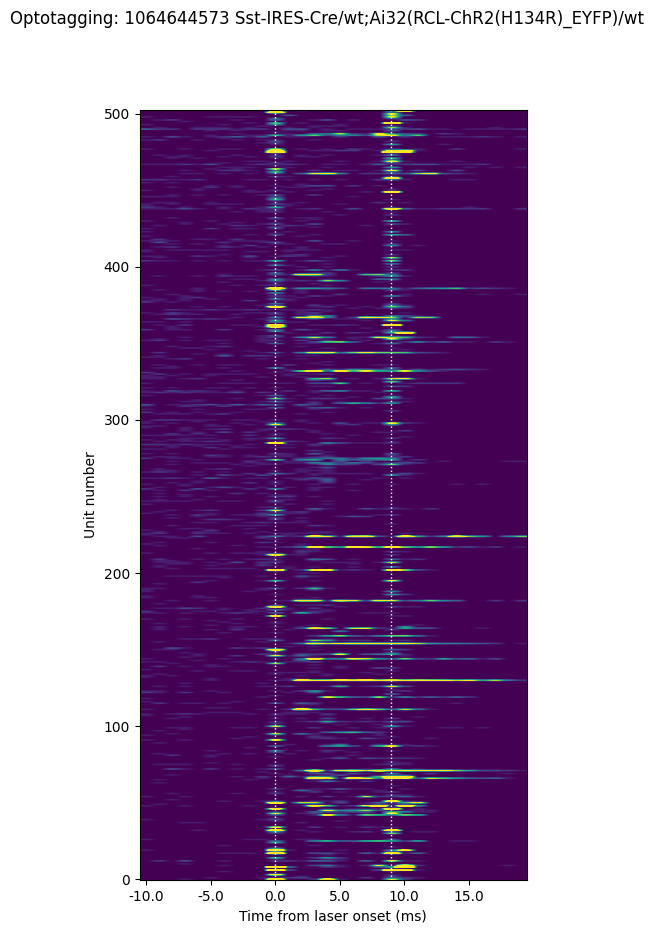

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches((5,10))
fig.suptitle('Optotagging: ' + str(session.metadata['ecephys_session_id'])
             + ' ' + session.metadata['full_genotype'])
im = ax.imshow(opto_response, 
               origin='lower', aspect='auto',
               )
min_clim_val = 0
max_clim_val = 250
im.set_clim([min_clim_val, max_clim_val])    
[ax.axvline(bound, linestyle=':', color='white', linewidth=1.0)\
     for bound in [10, 19]]
ax.set_xlabel('Time from laser onset (ms)')
ax.set_ylabel('Unit number')
ax.set_xticks(1000*bins[:-1:5])

time_labels = np.round(1000*(bins[:-1:5]-time_before), 0)
_=ax.set_xticklabels(time_labels)

Here we can see that most units don't respond to the short laser pulse. But there is a population that do show elevated firing rates. Note that the activity occurring at the onset and offset of the laser (along the dotted lines) is  artifactual and should be excluded from analysis.

Let's plot the response to the laser over the population:

In [21]:
baseline_window = slice(0, 9)  # baseline epoch
response_window = slice(11,18) # laser epoch

response_magnitudes = np.mean(opto_response[:, response_window], axis=1) \
                    - np.mean(opto_response[:, baseline_window], axis=1)

Text(0, 0.5, 'Unit Count')

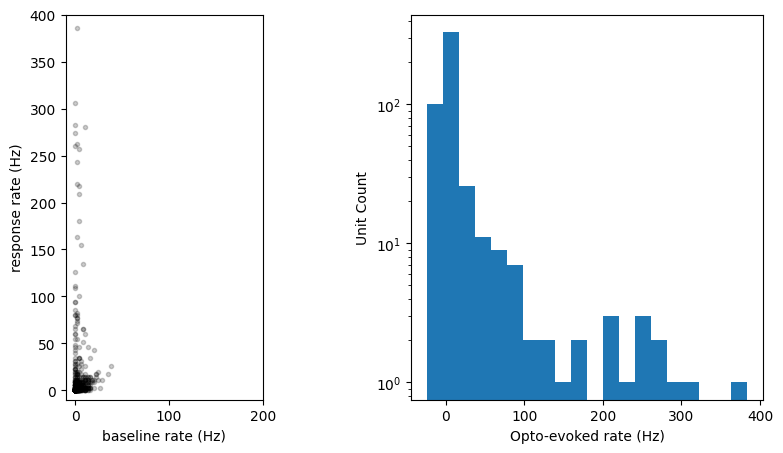

In [22]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(10, 5)

# Plot scatter of opto rate vs baseline rate
axes[0].plot(np.mean(opto_response[:, baseline_window], axis=1),
         np.mean(opto_response[:, response_window], axis=1), 'k.', alpha=0.2)
axes[0].set_xlim([-10, 200])
axes[0].set_ylim([-10, 400])
axes[0].set_aspect('equal')
axes[0].set_ylabel('response rate (Hz)')
axes[0].set_xlabel('baseline rate (Hz)')

# Plot histogram of opto-evoked rate (note log yscale)
_ = axes[1].hist(response_magnitudes, bins=20)
axes[1].set_yscale('log')
axes[1].set_xlabel('Opto-evoked rate (Hz)')
axes[1].set_ylabel('Unit Count')